<a href="https://colab.research.google.com/github/huangw195/voicecall/blob/main/Voice_Call_Quality_Customer_Experience_without_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading the data:

In [1]:
import warnings

In [2]:
#import all libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving datafile.xlsx to datafile.xlsx


In [4]:
import pandas as pd
from scipy.io import arff
import numpy as np
df=pd.read_excel('datafile.xlsx')
print(df.dtypes)

Operator               object
In Out Travelling      object
Network Type           object
Rating                  int64
Call Drop Category     object
Latitude              float64
Longitude             float64
State Name             object
dtype: object


In [5]:
df.head()

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
0,Airtel,Indoor,4G,1,Poor Voice Quality,-1.000000,-1.000000,NaN
1,Airtel,Outdoor,4G,1,Call Dropped,-1.000000,-1.000000,NaN
2,Airtel,Travelling,4G,1,Call Dropped,-1.000000,-1.000000,NaN
3,RJio,Indoor,4G,5,Satisfactory,19.871658,75.542397,Maharashtra
4,BSNL,Indoor,3G,1,Call Dropped,16.437764,80.997508,Andhra Pradesh


In [6]:
df.shape

(9092, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9092 entries, 0 to 9091
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Operator            9092 non-null   object 
 1   In Out Travelling   9092 non-null   object 
 2   Network Type        9092 non-null   object 
 3   Rating              9092 non-null   int64  
 4   Call Drop Category  9092 non-null   object 
 5   Latitude            9092 non-null   float64
 6   Longitude           9092 non-null   float64
 7   State Name          8824 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 568.4+ KB


In [8]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.99])

,Rating,Latitude,Longitude
count,9092.000000,9092.000000,9092.000000
mean,3.381874,20.253772,76.980535
std,1.552163,6.507887,14.577352
min,1.000000,-1.000000,-1.000000
10%,1.000000,12.940380,72.831904
25%,2.000000,17.066365,75.399569
50%,4.000000,21.046682,77.650621
75%,5.000000,24.088974,82.706647
90%,5.000000,28.580122,88.336735
99%,5.000000,31.630739,89.460648


Data Cleaning:

In [58]:
df.isnull().sum()

Operator              0
In Out Travelling     0
Network Type          0
Rating                0
Call Drop Category    0
Latitude              0
Longitude             0
State Name            0
dtype: int64

In [59]:
# Remove 3 cloumns
df=df.drop(['Latitude','Longitude','State Name'],axis=1)

In [60]:
# rechecking to make sure no more NAs in the dataframe
df.isnull().sum()

Operator              0
In Out Travelling     0
Network Type          0
Rating                0
Call Drop Category    0
dtype: int64

In [61]:
df['Call Drop Category'].value_counts()

Satisfactory          5854
Poor Voice Quality    2057
Call Dropped           913
Name: Call Drop Category, dtype: int64

In [62]:
df['Operator'].value_counts()

Airtel      3179
RJio        2755
Vodafone    1353
BSNL         829
Idea         604
MTNL         104
Name: Operator, dtype: int64

In [63]:
df['In Out Travelling'].value_counts()

Indoor        6386
Outdoor       1972
Travelling     466
Name: In Out Travelling, dtype: int64

In [64]:
df['Network Type'].value_counts()

4G         6194
Unknown    1462
3G          804
2G          364
Name: Network Type, dtype: int64

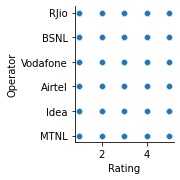

In [65]:
sns.pairplot(y_vars='Operator',x_vars='Rating',data=df)

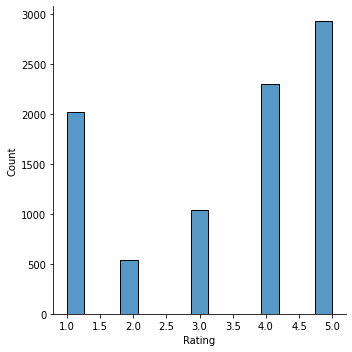

In [66]:
# distribution of rating
sns.displot(df['Rating'])
plt.show()

We have almost looked into most of the column individually. Now let us explore data visulaization to look for any patterns.



**Data Visulaization:**

In [67]:
df_numeric=df.select_dtypes(include=['int64','float64'])
df_numeric.head()

,Rating
3,5
4,1
5,1
8,5
9,1


<Figure size 2160x2160 with 0 Axes>

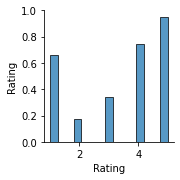

In [68]:
plt.figure(figsize=(30,30))
sns.pairplot(df_numeric)
plt.show()

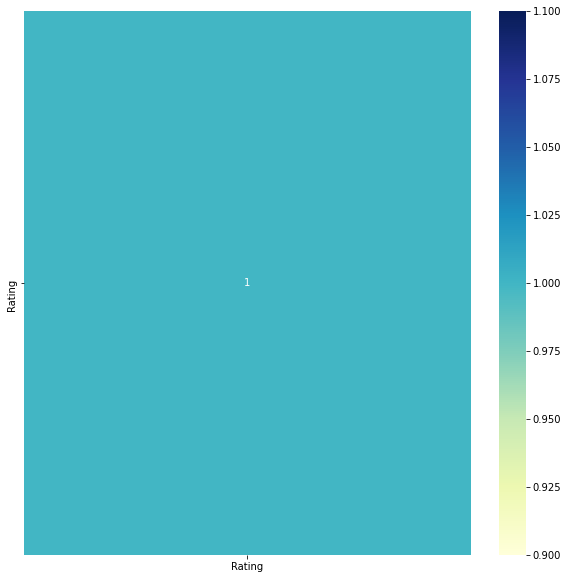

In [69]:
# correlation
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

In [70]:
categorical_cols = df.select_dtypes(include = ['object'])
categorical_cols.head()

,Operator,In Out Travelling,Network Type,Call Drop Category
3,RJio,Indoor,4G,Satisfactory
4,BSNL,Indoor,3G,Call Dropped
5,Vodafone,Indoor,4G,Poor Voice Quality
8,Vodafone,Indoor,4G,Satisfactory
9,RJio,Indoor,4G,Call Dropped


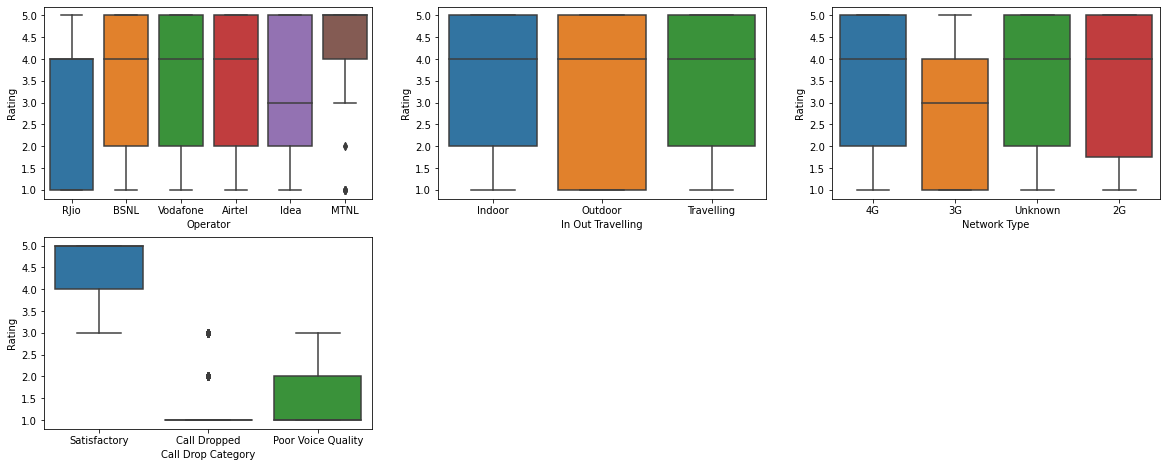

In [71]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'Operator', y = 'Rating', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'In Out Travelling', y = 'Rating', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'Network Type', y = 'Rating', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'Call Drop Category', y = 'Rating', data = df)

1. From the price boxplot it is clear that Network Type with 4G in the dataset has the highest rating.
2. Call Dropped has the lowest Rating compared to other Call Drop Categories.
3. The median rating of Indoor is the same as that of Outdoor.
4. Indoor and Outdoor are almost equally rated. There are however some outliers.
 



**Data preparation:**


In [73]:
#creating dummies
df_dummies = pd.get_dummies(categorical_cols, drop_first = True)
df_dummies.head()

,Operator_BSNL,Operator_Idea,Operator_MTNL,Operator_RJio,Operator_Vodafone,In Out Travelling_Outdoor,In Out Travelling_Travelling,Network Type_3G,Network Type_4G,Network Type_Unknown,Call Drop Category_Poor Voice Quality,Call Drop Category_Satisfactory
3,0,0,0,1,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,1,0,1,0
8,0,0,0,0,1,0,0,0,1,0,0,1
9,0,0,0,1,0,0,0,0,1,0,0,0


In [74]:
rating_df=pd.concat([df,df_dummies],axis=1)

In [75]:
rating_df=rating_df.drop(['Operator','In Out Travelling','Network Type','Call Drop Category'],axis=1)

In [76]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8824 entries, 3 to 9091
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Rating                                 8824 non-null   int64
 1   Operator_BSNL                          8824 non-null   uint8
 2   Operator_Idea                          8824 non-null   uint8
 3   Operator_MTNL                          8824 non-null   uint8
 4   Operator_RJio                          8824 non-null   uint8
 5   Operator_Vodafone                      8824 non-null   uint8
 6   In Out Travelling_Outdoor              8824 non-null   uint8
 7   In Out Travelling_Travelling           8824 non-null   uint8
 8   Network Type_3G                        8824 non-null   uint8
 9   Network Type_4G                        8824 non-null   uint8
 10  Network Type_Unknown                   8824 non-null   uint8
 11  Call Drop Category_Poor Voice 

In [77]:
rating_df

,Rating,Operator_BSNL,Operator_Idea,Operator_MTNL,Operator_RJio,Operator_Vodafone,In Out Travelling_Outdoor,In Out Travelling_Travelling,Network Type_3G,Network Type_4G,Network Type_Unknown,Call Drop Category_Poor Voice Quality,Call Drop Category_Satisfactory
3,5,0,0,0,1,0,0,0,0,1,0,0,1
4,1,1,0,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,1,0,1,0
8,5,0,0,0,0,1,0,0,0,1,0,0,1
9,1,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9087,1,0,0,0,1,0,0,0,0,1,0,1,0
9088,1,0,0,0,0,0,1,0,1,0,0,0,0
9089,5,0,0,0,0,0,0,0,0,1,0,0,1
9090,4,0,0,0,1,0,0,0,0,1,0,0,1


**Spliting the data into test and train**

In [78]:
df_train, df_test = train_test_split(rating_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [79]:
df_train.shape


(6176, 13)

In [80]:
df_test.shape


(2648, 13)

**Model Building**

In [81]:
import warnings

In [82]:
y_train = df_train.pop('Rating')
X_train = df_train

**Model building using RFE**

In [105]:
lr = LinearRegression()
lr.fit(X_train,y_train)
rfe=RFE(lr,15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [106]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Operator_BSNL', True, 1),
 ('Operator_Idea', True, 1),
 ('Operator_MTNL', True, 1),
 ('Operator_RJio', True, 1),
 ('Operator_Vodafone', True, 1),
 ('In Out Travelling_Outdoor', True, 1),
 ('In Out Travelling_Travelling', True, 1),
 ('Network Type_3G', True, 1),
 ('Network Type_4G', True, 1),
 ('Network Type_Unknown', True, 1),
 ('Call Drop Category_Poor Voice Quality', True, 1),
 ('Call Drop Category_Satisfactory', True, 1)]

In [107]:
cols = X_train.columns[rfe.support_]
cols

Index(['Operator_BSNL', 'Operator_Idea', 'Operator_MTNL', 'Operator_RJio',
       'Operator_Vodafone', 'In Out Travelling_Outdoor',
       'In Out Travelling_Travelling', 'Network Type_3G', 'Network Type_4G',
       'Network Type_Unknown', 'Call Drop Category_Poor Voice Quality',
       'Call Drop Category_Satisfactory'],
      dtype='object')

**Model 1:**

In [108]:
X1 = X_train[cols]
X1_sm = sm.add_constant(X1)
lr_1 = sm.OLS(y_train,X1_sm).fit()

In [109]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     2221.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:14:34   Log-Likelihood:                -6307.1
No. Observations:                6176   AIC:                         1.264e+04
Df Residuals:                    6163   BIC:                         1.273e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [110]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,Operator_MTNL,1.03
9,Network Type_Unknown,0.54
1,Operator_Idea,0.48
10,Call Drop Category_Poor Voice Quality,0.26
6,In Out Travelling_Travelling,0.24
4,Operator_Vodafone,0.23
0,Operator_BSNL,0.18
3,Operator_RJio,0.14
7,Network Type_3G,0.13
5,In Out Travelling_Outdoor,0.09


**Building the model with 10 variables:**

In [111]:
lr2 = LinearRegression()
rfe2 = RFE(lr2,10)
rfe2.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [112]:
list(zip(X_train.columns,rfe2.support_,rfe2.ranking_))

[('Operator_BSNL', True, 1),
 ('Operator_Idea', True, 1),
 ('Operator_MTNL', True, 1),
 ('Operator_RJio', True, 1),
 ('Operator_Vodafone', True, 1),
 ('In Out Travelling_Outdoor', False, 3),
 ('In Out Travelling_Travelling', True, 1),
 ('Network Type_3G', True, 1),
 ('Network Type_4G', True, 1),
 ('Network Type_Unknown', False, 2),
 ('Call Drop Category_Poor Voice Quality', True, 1),
 ('Call Drop Category_Satisfactory', True, 1)]

In [113]:
supported_cols = X_train.columns[rfe2.support_]
supported_cols

Index(['Operator_BSNL', 'Operator_Idea', 'Operator_MTNL', 'Operator_RJio',
       'Operator_Vodafone', 'In Out Travelling_Travelling', 'Network Type_3G',
       'Network Type_4G', 'Call Drop Category_Poor Voice Quality',
       'Call Drop Category_Satisfactory'],
      dtype='object')

**Model 2:**

In [114]:
X2 = X_train[supported_cols]
X2_sm = sm.add_constant(X2)
model_2 = sm.OLS(y_train,X2_sm).fit()

In [116]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     2666.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:16:02   Log-Likelihood:                -6307.1
No. Observations:                6176   AIC:                         1.264e+04
Df Residuals:                    6165   BIC:                         1.271e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [117]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,Operator_MTNL,1.02
1,Operator_Idea,0.48
4,Operator_Vodafone,0.23
5,In Out Travelling_Travelling,0.23
8,Call Drop Category_Poor Voice Quality,0.19
0,Operator_BSNL,0.17
3,Operator_RJio,0.14
6,Network Type_3G,0.11
7,Network Type_4G,0.01
9,Call Drop Category_Satisfactory,0.01


As we see, still there are columns with high VIF. Let us drop column Operator_MTNL.



**Model 3:**

In [118]:
X3 = X2.drop(['Operator_MTNL'], axis =1)
X3_sm = sm.add_constant(X3)
Model_3 = sm.OLS(y_train,X3_sm).fit()

In [119]:
print(Model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     2944.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:17:25   Log-Likelihood:                -6322.4
No. Observations:                6176   AIC:                         1.266e+04
Df Residuals:                    6166   BIC:                         1.273e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [120]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,Operator_Idea,0.48
3,Operator_Vodafone,0.23
4,In Out Travelling_Travelling,0.23
7,Call Drop Category_Poor Voice Quality,0.19
0,Operator_BSNL,0.17
2,Operator_RJio,0.14
5,Network Type_3G,0.11
6,Network Type_4G,0.01
8,Call Drop Category_Satisfactory,0.01


**Residual analysis:**

In [122]:
y_train_pred = Model_3.predict(X3_sm)
y_train_pred.head()

8482    4.585158
72      4.585158
1986    4.269837
8383    4.310975
3830    1.755582
dtype: float64

In [123]:
Residual = y_train- y_train_pred

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


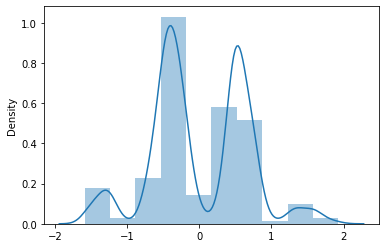

In [125]:
sns.distplot(Residual, bins =10)

**Making Predictions:**

In [126]:
y_test = df_test.pop('Rating')
X_test = df_test

KeyError: ignored

In [127]:
final_cols = X1.columns

In [128]:
X_test_model= X_test[final_cols]
X_test_model.head()

,Operator_BSNL,Operator_Idea,Operator_MTNL,Operator_RJio,Operator_Vodafone,In Out Travelling_Outdoor,In Out Travelling_Travelling,Network Type_3G,Network Type_4G,Network Type_Unknown,Call Drop Category_Poor Voice Quality,Call Drop Category_Satisfactory
1586,0,0,0,1,0,0,0,0,1,0,1,0
7519,1,0,0,0,0,0,0,1,0,0,0,1
3541,1,0,0,0,0,0,0,1,0,0,0,1
1074,0,0,0,1,0,1,0,0,1,0,0,0
8663,0,0,0,0,0,0,0,0,0,1,0,1


In [129]:
X_test_sm = sm.add_constant(X_test_model)

In [130]:
y_pred = lr_1.predict(X_test_sm)

In [131]:
y_pred.head()

1586    1.444564
7519    4.167640
3541    4.167640
1074    1.136348
8663    4.405896
dtype: float64

Text(0, 0.5, 'y_pred')

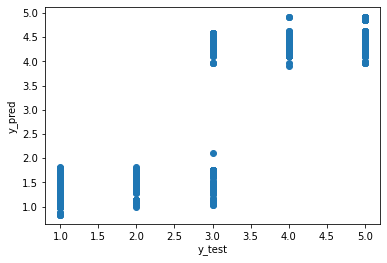

In [132]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [133]:
r_squ = r2_score(y_test,y_pred)
r_squ

0.8086020445818202

In [134]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

In [135]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
#tn, fp, fn, tp = 
#x=cf.ravel()
#print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)
#print(x)

Confusion Matrix
[[481   1   0  26  90]
 [161   0   0   4   7]
 [119   0   0  37 160]
 [  0   0   0 274 405]
 [  0   0   0 183 700]]


In [136]:
cnf_matrix=cf

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


In [137]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))
# Precision is defined as the number of true positives divided by the number of true positives plus the number of false positives.

              precision    recall  f1-score   support

           1       0.63      0.80      0.71       598
           2       0.00      0.00      0.00       172
           3       0.00      0.00      0.00       316
           4       0.52      0.40      0.46       679
           5       0.51      0.79      0.62       883

    accuracy                           0.55      2648
   macro avg       0.33      0.40      0.36      2648
weighted avg       0.45      0.55      0.48      2648



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*So linear equation for price can be given as: Rating = -1.2939 + 0.0398 × Operator_BSNL - 0.1615 x Operator_Idea - Operator_Rjio x 0.2204 + 0.095 Operator_Vodafone + In Out Travelling_Travelling x 0.0411 - 0.2953 x Network Type_3G +0.0694 x Network Type_4G + 0.2973 x Call Drop Category_Poor Voice Quality + 3.1269x Call Drop Category_Satisfactory*



**Which variables are significant in predicting the Rating?**



*   Operator_BSNL

*   Operator_Idea

*   Operator_Rjio
*   Operator_Vodafone


*   In Out Travelling_Travelling


*   Network Type_3G


*   Call Drop Category_Poor Voice Quality 
*   Call Drop Category_Satisfactory


